In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
with open("../data-last-fm/lfm-360-gender.json") as json_data:
    album_data = json.load(json_data)

In [3]:
artist_gender = pd.Series(album_data)

In [4]:
artist_gender.head()

b3ae82c2-e60b-4551-a76d-6620f1b456aa    Female
ff6e677f-91dd-4986-a174-8db0474b1799      Male
8688124b-dcff-4a39-9f30-4825d445014f      Male
c995a379-60b9-404b-bd97-a7e2de0751d3      Male
0fb62639-4143-443b-8779-6867a1d08230    Female
dtype: object

In [5]:
user_profiles = pd.read_csv(
    "../data-last-fm/lastfm-dataset-360K/usersha1-profile.tsv",
    delimiter="\t", 
    header=None, 
    names=["user_id", "gender", "age", "country", "date_of_signup"]
    )

In [6]:
user_profiles.head()

,user_id,gender,age,country,date_of_signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [7]:
plays = pd.read_csv(
    "../data-last-fm/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv",
    delimiter="\t",
    header=None,
    names=["user_id", "artist_id", "artist-name", "plays"])

In [8]:
plays.head()

,user_id,artist_id,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


# Individual Columns

## Do these values make sense? (Use Domain Knowledge)

### Age

In [9]:
# How many users have no age?
na_users = user_profiles["age"].isna().sum()
print(f"Total number of users is {user_profiles.shape[0]}. {na_users/user_profiles.shape[0]*100}% have no age.")

Total number of users is 359347. 20.84336310029025% have no age.


In [10]:
# Ages should be between 12-100 realistically.
# Note: Describe ignores NaN values
user_profiles["age"].describe()

count    284447.000000
mean         25.098046
std          21.665742
min       -1337.000000
25%          20.000000
50%          23.000000
75%          28.000000
max        1002.000000
Name: age, dtype: float64

In [11]:
# Note: It's OK for EDA code to be messy

<AxesSubplot:>

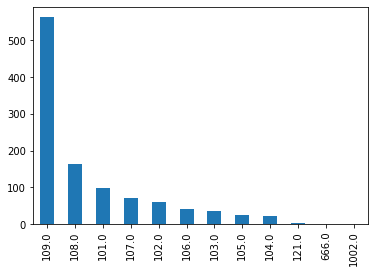

In [12]:
# How many users that are older than 100 are in the dataset?
user_profiles[user_profiles["age"] > 100]["age"].value_counts().plot.bar()

<AxesSubplot:>

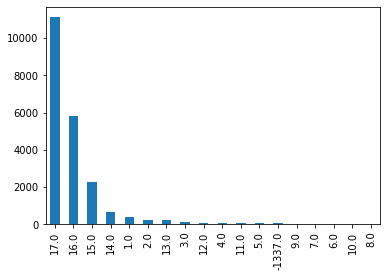

In [13]:
# Can minors create accounts?
user_profiles[user_profiles["age"] < 18]["age"].value_counts().plot.bar()

In [14]:
user_profiles["unrealistic_age"] = user_profiles["age"].map(lambda x: True if (-2000 < x < 7) or (x > 109) else False)

In [15]:
user_profiles[user_profiles["unrealistic_age"]]

,user_id,gender,age,country,date_of_signup,unrealistic_age
268,002f3405370e016672eefea0fda8448df252344e,f,2.0,Belgium,"Dec 31, 2007",True
468,0054e7082b91d7ccbe0e7b1b3b72a7c18a22932f,m,-1337.0,United Kingdom,"Aug 7, 2008",True
753,008a54ca792d90dae28bf06a4419c804701039d4,NaN,2.0,Mexico,"Mar 18, 2007",True
856,009e420e12cb44fa4e6b58d31009334618061454,NaN,3.0,Germany,"Jan 9, 2008",True
863,00a08fcaea5156ecb65ab04483e8702ae7434715,NaN,1.0,United States,"Sep 9, 2008",True
...,...,...,...,...,...,...
357598,fec09168337e8e7630a9dd28bc2d4d04c713c16b,NaN,1.0,Mexico,"Jul 2, 2008",True
357688,fed141cb516f21ca3bffb58680cfac0ba90a3b41,m,-1337.0,Canada,"Mar 29, 2008",True
357918,fef83ce188436cb07dc7efe3d66854222ac94290,m,-1337.0,Mexico,"Feb 26, 2009",True
358320,ff415666259a4a0c16650528038954c69f9f4dd8,m,1.0,Italy,"Jun 8, 2008",True


### Gender

In [16]:
na_gender = user_profiles["gender"].isna().sum()
print(f"{na_gender/user_profiles.shape[0]*100}% have no gender.")

9.12071062232327% have no gender.


In [17]:
user_profiles["gender"].describe()

count     326572
unique         2
top            m
freq      241642
Name: gender, dtype: object

### Country

In [18]:
user_profiles["country"].describe()

count            359347
unique              239
top       United States
freq              67044
Name: country, dtype: object

In [19]:
user_profiles["country"].isna().sum()

0

In [20]:
user_profiles["country"].value_counts()

United States         67044
Germany               31651
United Kingdom        29902
Poland                20987
Russian Federation    19833
                      ...  
Marshall Islands          4
Palau                     3
Benin                     3
Liberia                   3
Gambia                    3
Name: country, Length: 239, dtype: int64

### Date of Signup

In [21]:
user_profiles["date_of_signup"].isna().sum()

0

In [22]:
user_profiles["date_of_signup"].describe()

count           359347
unique            2298
top       Jan 24, 2008
freq               569
Name: date_of_signup, dtype: object

In [23]:
user_profiles["date_of_signup"].agg(["min", "max"])

min    Apr 1, 2003
max    Sep 9, 2009
Name: date_of_signup, dtype: object

In [24]:
user_profiles["year_of_signup"] = user_profiles["date_of_signup"].map(lambda x: x[-4:])

<AxesSubplot:>

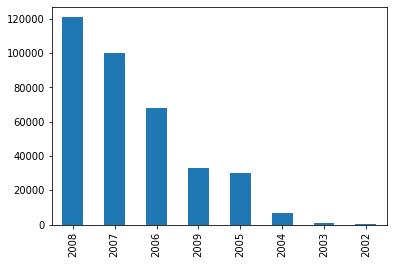

In [25]:
user_profiles["year_of_signup"].value_counts().plot.bar()

In [26]:
# Each value should be unique
user_profiles["user_id"].nunique() == user_profiles.shape[0]

True

In [27]:
# Check if all user_ids are hexadecimal strings of 40 characters
user_id_matches = user_profiles["user_id"].str.fullmatch("^[a-f0-9]{40}$")

In [28]:
user_profiles[~user_id_matches]

,user_id,gender,age,country,date_of_signup,unrealistic_age,year_of_signup


## Plays

In [29]:
plays.head()

,user_id,artist_id,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [30]:
# Are there any missing user IDs?
plays["user_id"].isna().sum()

0

In [31]:
# Any missing artist IDs?
plays["artist_id"].isna().sum()

226137

In [32]:
# Missing artist names? 
plays["artist-name"].isna().sum()

204

In [33]:
# Which artists don't have an artist name?
plays[plays["artist-name"].isna()]["artist_id"].unique()

array(['3f0bdf7f-3f40-4795-8b91-1fde13192b09', nan], dtype=object)

In [34]:
# Check if all user_ids are hexadecimal strings of 40 characters
user_id_matches = plays["user_id"].str.fullmatch("^[a-f0-9]{40}$")
plays[~user_id_matches]

,user_id,artist_id,artist-name,plays
15257652,"dec 27, 2008",fee8e811-a2dc-4c09-8484-3c2aca38c3f9,orange range,450
15257653,"dec 27, 2008",ffa25bb8-a082-4b47-aa4c-9ef48df98dc6,bonnie pink,405
15257654,"dec 27, 2008",18191eea-369f-42e8-96ab-c1c24e4d0011,いきものがかり,343
15257655,"dec 27, 2008",b3710b68-6b04-49e1-a3a6-a679f16243b4,loveholic,330
15257656,"dec 27, 2008",031037c3-67be-459f-bd50-b51760501f38,se7en,308
...,...,...,...,...
17535650,"sep 20, 2008",7ffd711a-b34d-4739-8aab-25e045c246da,turbostaat,12
17535651,"sep 20, 2008",9201190d-409f-426b-9339-9bd7492443e2,cuba missouri,11
17535652,"sep 20, 2008",e7cf7ff9-ed2f-4315-aca8-bcbd3b2bfa71,little man tate,11
17535653,"sep 20, 2008",f6f2326f-6b25-4170-b89d-e235b25508e8,sigur rós,10


In [35]:
# Check if all user_ids are hexadecimal strings of 40 characters
user_id_matches = plays["user_id"].str.fullmatch("^[a-f0-9]{40}$")
plays[~user_id_matches]

,user_id,artist_id,artist-name,plays
15257652,"dec 27, 2008",fee8e811-a2dc-4c09-8484-3c2aca38c3f9,orange range,450
15257653,"dec 27, 2008",ffa25bb8-a082-4b47-aa4c-9ef48df98dc6,bonnie pink,405
15257654,"dec 27, 2008",18191eea-369f-42e8-96ab-c1c24e4d0011,いきものがかり,343
15257655,"dec 27, 2008",b3710b68-6b04-49e1-a3a6-a679f16243b4,loveholic,330
15257656,"dec 27, 2008",031037c3-67be-459f-bd50-b51760501f38,se7en,308
...,...,...,...,...
17535650,"sep 20, 2008",7ffd711a-b34d-4739-8aab-25e045c246da,turbostaat,12
17535651,"sep 20, 2008",9201190d-409f-426b-9339-9bd7492443e2,cuba missouri,11
17535652,"sep 20, 2008",e7cf7ff9-ed2f-4315-aca8-bcbd3b2bfa71,little man tate,11
17535653,"sep 20, 2008",f6f2326f-6b25-4170-b89d-e235b25508e8,sigur rós,10


In [36]:
# Perform a regex check on artist_ids
artist_id_matches = plays["artist_id"].str.fullmatch(
    "^[a-f0-9]{8}-[a-f0-9]{4}-[a-f0-9]{4}-[a-f0-9]{4}-[a-f0-9]{12}$")
# Pandas doesn't like NaNs, so we fill them with a True value to exclude them here
plays[~artist_id_matches.fillna(True)]

,user_id,artist_id,artist-name,plays
15225,003686d963ca60c0363ad4865b5db55411f6cad6,94144c85-c5ee-4ec6-85cd-15e48b16ffea,clipz,308
25114,005c1d5e5bce39d9b41d2a16d8a178d4a2b4052f,febd11c8-76b7-43bd-a4b9-d22776c3d0f3,al-fatnujah,61
36801,0088cc547a3877d043fe12721a7eae745c45b5f7,1e69316c-14fa-42ba-88f2-06f6743632f,alexander rybak,80
37212,008ac985db5b498e91c286ba539e0395451ae930,1e69316c-14fa-42ba-88f2-06f6743632f,alexander rybak,87
58036,00d1ddc76d20955fe34d7cfe91fac338fd7912cb,4a945ad5-5f21-449d-ac51-fac9d6b8c118,matrix and futurebound,31
...,...,...,...,...
17504188,ff84ae0662dbac665ac8d73242ee0e4f0a4f0ae8,6409a09d-826f-43a7-90dc-9650a848742c,dsound,618
17506801,ff8e577b766ae845967aa4ecfbbeab6ffbdb5345,8a527c65-35dc-4984-84ac-fab0a6d8ae5,g.g. anderson,231
17527607,ffdfb831fc30cb1e4c9e7072ace4be315f6267fd,1e69316c-14fa-42ba-88f2-06f6743632f,alexander rybak,151
17528397,ffe405098f3e2d8e72c3c723fcb422db523a70fc,e2b294b7-f705-4317-a96b-fd94da3719e5,mstislav rostropovich,186


In [49]:
plays[~artist_id_matches.fillna(True)]["artist_id"].values

array(['94144c85-c5ee-4ec6-85cd-15e48b16ffea ',
       'febd11c8-76b7-43bd-a4b9-d22776c3d0f3 ',
       '1e69316c-14fa-42ba-88f2-06f6743632f', ...,
       '1e69316c-14fa-42ba-88f2-06f6743632f',
       'e2b294b7-f705-4317-a96b-fd94da3719e5 ',
       '081d201a-1240-4364-b7d1-21e0e45b81c'], dtype=object)

In [37]:
# Can we fill in the missing values for artist ID?
artist_name_to_id_index = plays[["artist_id", "artist-name"]].dropna(
).drop_duplicates().set_index("artist-name")["artist_id"].to_dict()

In [112]:
plays["artist_id_filled"] = plays["artist-name"].map(lambda x: artist_name_to_id_index.get(x))

In [113]:
plays[~artist_id_matches.fillna(False)]

,user_id,artist_id,artist-name,plays,artist_gender,artist_id_filled
158,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,NaN,rock universal,14,None,None
241,00007a47085b9aab8af55f52ec8846ac479ac4fe,NaN,apes & androids,67,None,None
441,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,NaN,fondo flamenco,3,None,None
499,0001399387da41d557219578fb08b12afa25ab67,NaN,id software,31,None,f34a6780-93cc-4a01-83bd-84777895fba2
605,0001a57568309b287363e72dc682e9a170ba6dc2,NaN,haircut 100,83,None,bbb94ad0-3bb7-42af-99cd-e92f5a42c4c5
...,...,...,...,...,...,...
17535374,fffe454af08a58c7bafe77491b586711f6b5e6f1,NaN,eric clapton and steve winwood,26,None,None
17535407,fffe7823f67b433b45f22056467db921c1d3d7d0,NaN,big city beats,52,None,None
17535458,fffe8637bd8234309e871409c7ebef99a720afc1,NaN,suzanina,45,None,None
17535486,fffe8c7f952d9b960a56ed4dcb40a415d924b224,NaN,bionic commando,235,None,None


In [39]:
valid_plays = plays.dropna(axis=0, subset=["artist-name"])

In [40]:
artist_popularity = valid_plays.groupby("artist-name")["plays"].sum().sort_values(ascending=False)

In [41]:
artist_popularity.head(10)

artist-name
the beatles              30466827
radiohead                27426234
coldplay                 16686772
pink floyd               15943557
metallica                15481852
muse                     15451683
nine inch nails          14075619
red hot chili peppers    13547741
linkin park              12836638
system of a down         11917336
Name: plays, dtype: int64

<AxesSubplot:>

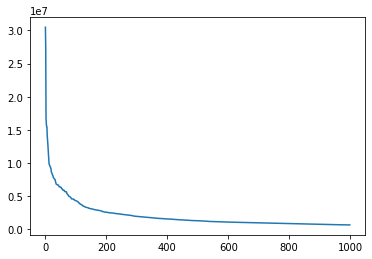

In [47]:
sns.lineplot(data=artist_popularity[0:1000].values)

<AxesSubplot:>

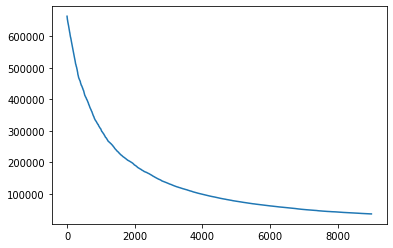

In [48]:
sns.lineplot(data=artist_popularity[1000:10000].values)

In [65]:
artist_gender_dict = artist_gender.to_dict()

In [70]:
plays.groupby("artist_gender").size()

artist_gender
Female            1478652
Male              4067935
Not applicable        299
Other                6123
dtype: int64

In [72]:
plays.groupby("artist_gender").sum()

,plays
artist_gender,
Female,277953818
Male,739667949
Not applicable,55019
Other,1156543


In [68]:
plays

,user_id,artist_id,artist-name,plays,artist_gender
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137,None
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099,None
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897,Female
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717,None
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706,None
...,...,...,...,...,...
17535650,"sep 20, 2008",7ffd711a-b34d-4739-8aab-25e045c246da,turbostaat,12,None
17535651,"sep 20, 2008",9201190d-409f-426b-9339-9bd7492443e2,cuba missouri,11,None
17535652,"sep 20, 2008",e7cf7ff9-ed2f-4315-aca8-bcbd3b2bfa71,little man tate,11,None
17535653,"sep 20, 2008",f6f2326f-6b25-4170-b89d-e235b25508e8,sigur rós,10,None


In [52]:
user_activity = valid_plays.groupby("user_id")["plays"].sum().sort_values(ascending=False)

<AxesSubplot:>

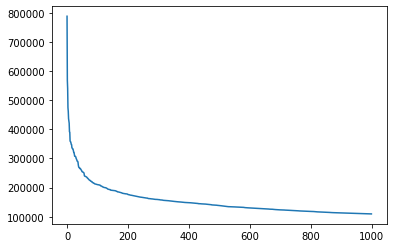

In [56]:
sns.lineplot(data=user_activity[:1000].values)

<AxesSubplot:>

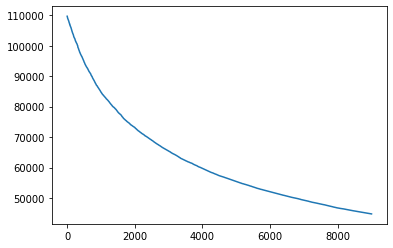

In [55]:
sns.lineplot(data=user_activity[1000:10000].values)

In [75]:
plays["plays"].describe()

count    1.753566e+07
mean     2.151932e+02
std      6.144815e+02
min      0.000000e+00
25%      3.500000e+01
50%      9.400000e+01
75%      2.240000e+02
max      4.191570e+05
Name: plays, dtype: float64

<AxesSubplot:xlabel='plays', ylabel='Count'>

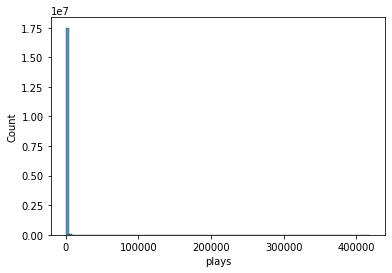

In [74]:
sns.histplot(data=plays, x="plays", bins=100)

In [78]:
quant99 = plays["plays"].quantile(0.99)

<AxesSubplot:xlabel='plays', ylabel='Count'>

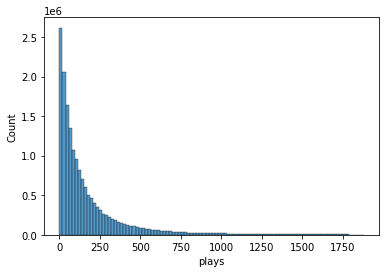

In [79]:
sns.histplot(data=plays[plays["plays"] < quant99], x="plays", bins=100)

<AxesSubplot:xlabel='plays', ylabel='Count'>

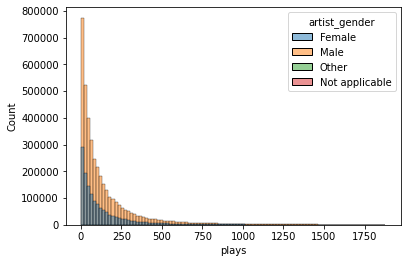

In [80]:
sns.histplot(data=plays[plays["plays"] < quant99], x="plays", bins=100, hue="artist_gender")

In [85]:
user_profiles

,user_id,gender,age,country,date_of_signup,unrealistic_age,year_of_signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",False,2007
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007",False,2007
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006",False,2006
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008",False,2008
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006",False,2006
...,...,...,...,...,...,...,...
359342,fffe7823f67b433b45f22056467db921c1d3d7d0,m,25.0,Germany,"Jun 24, 2006",False,2006
359343,fffe8637bd8234309e871409c7ebef99a720afc1,m,25.0,Brazil,"Sep 9, 2007",False,2007
359344,fffe8c7f952d9b960a56ed4dcb40a415d924b224,m,20.0,United States,"Aug 8, 2007",False,2007
359345,ffff9af9ae04d263dae91cb838b1f3a6725f5ffb,m,20.0,Russian Federation,"Dec 3, 2005",False,2005


In [89]:
selected_users = user_profiles[
    (user_profiles["age"] > 0) &
    (user_profiles["age"] < 100) &
    (user_profiles["country"].isin(["United States", "Germany", "United Kingdom", "Poland", "Russian Federation"]))
]

<AxesSubplot:xlabel='age', ylabel='country'>

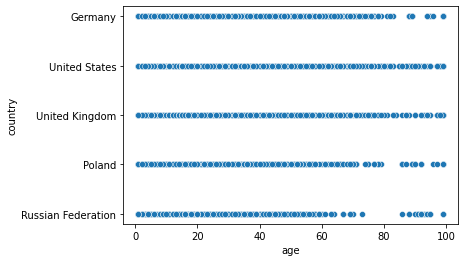

In [90]:
sns.scatterplot(data=selected_users, x="age", y="country")

In [92]:
merged_df = pd.merge(plays, user_profiles, on="user_id")

In [95]:
most_popular_artist_by_country = merged_df.groupby(["country"])["artist-name"].agg(pd.Series.mode)

In [102]:
most_popular_artist_by_country

country
Afghanistan                                                  radiohead
Albania                                                      metallica
Algeria                                           [[unknown], rihanna]
American Samoa                                               radiohead
Andorra                                                     obrint pas
                                           ...                        
Wallis and Futuna                                          the beatles
Western Sahara                                               radiohead
Yemen                                                 system of a down
Zambia               [bob dylan, bob marley & the wailers, coldplay...
Zimbabwe                                                      coldplay
Name: artist-name, Length: 239, dtype: object

In [110]:
most_popular_artist_by_country[
    ["Uruguay", "Belgium", "United States", "Nigeria", "Netherlands", "Japan", 
    "Philippines", "Canada", "Spain", "France", "Germany", "Morocco", "Algeria"]
    ]

country
Uruguay                   the beatles
Belgium                     radiohead
United States             the beatles
Nigeria                          akon
Netherlands                  coldplay
Japan                     the beatles
Philippines               eraserheads
Canada                      radiohead
Spain                        coldplay
France                      radiohead
Germany                     die Ärzte
Morocco                      coldplay
Algeria          [[unknown], rihanna]
Name: artist-name, dtype: object